# Arttu Häkkinen
# 596077

In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns={'name': ['Clover', 'Sunny', 'Rose', 'Daisy', 'Strawberry', 'Molly'],
         'race': ['Holstein', 'Ayrshire', 'Holstein', 'Ayrshire', 'Finncattle', 'Ayrshire'],
         'age': [2.0, 2.0, 5.0, 4.0, 7.0, 8.0],
         'milk/d': [20.0, 10.0, 15.0, 25.0, 35.0, 45.0],
         'character': ['lively', 'kind', 'calm', 'calm', 'calm', 'kind'],
         'music': ['rock', 'rock', 'country', 'classical', 'classical', 'country']}
table = pd.DataFrame(columns)
table

,name,race,age,milk/d,character,music
0,Clover,Holstein,2.0,20.0,lively,rock
1,Sunny,Ayrshire,2.0,10.0,kind,rock
2,Rose,Holstein,5.0,15.0,calm,country
3,Daisy,Ayrshire,4.0,25.0,calm,classical
4,Strawberry,Finncattle,7.0,35.0,calm,classical
5,Molly,Ayrshire,8.0,45.0,kind,country


## a)

In [3]:
# Helper function for minmax scaling
def minmax_scale(x):
    y = np.zeros_like(x)
    for i, x_i in enumerate(x):
        y[i] = (x_i - np.min(x)) / (np.max(x) - np.min(x))
    return y

# Scale the numerical features age and milk/d
table['age'] = minmax_scale(table['age'].values)
table['milk/d'] = minmax_scale(table['milk/d'].values)
table

,name,race,age,milk/d,character,music
0,Clover,Holstein,0.000000,0.285714,lively,rock
1,Sunny,Ayrshire,0.000000,0.000000,kind,rock
2,Rose,Holstein,0.500000,0.142857,calm,country
3,Daisy,Ayrshire,0.333333,0.428571,calm,classical
4,Strawberry,Finncattle,0.833333,0.714286,calm,classical
5,Molly,Ayrshire,1.000000,1.000000,kind,country


In [4]:
# Calculating pairwise Euclidean distances between cows
def euclidean(x, y):
    return np.round(np.sqrt(np.sum((x-y)**2)), 2)

numsim = {} # Dict to store the similarities in
A = table[['age', 'milk/d']].values
cows = list(table.name.values)
n, d = A.shape
print("Pairwise Euclidean distances between cows...")
visited = []
for i in range(n):
    for j in range(n):
        if (j, i) not in visited:
            visited.append((i, j))
            if j != i:
                x = A[i,:].T
                y = A[j,:].T
                print("- ...{} and {} is {}.".format(cows[i], cows[j], euclidean(x, y)))
                
                # Add to the dict so that we can use the calculated distances later...
                numsim[(cows[i], cows[j])] = euclidean(x, y)

Pairwise Euclidean distances between cows...
- ...Clover and Sunny is 0.29.
- ...Clover and Rose is 0.52.
- ...Clover and Daisy is 0.36.
- ...Clover and Strawberry is 0.94.
- ...Clover and Molly is 1.23.
- ...Sunny and Rose is 0.52.
- ...Sunny and Daisy is 0.54.
- ...Sunny and Strawberry is 1.1.
- ...Sunny and Molly is 1.41.
- ...Rose and Daisy is 0.33.
- ...Rose and Strawberry is 0.66.
- ...Rose and Molly is 0.99.
- ...Daisy and Strawberry is 0.58.
- ...Daisy and Molly is 0.88.
- ...Strawberry and Molly is 0.33.


## b)

Defining Goodall similarity distance measure

$$ d_G = 1 - G = 1 - \dfrac{\sum_{A_i shared}(1 - p_i^2(shared))}{d}$$

where $d$ is the number of features and $p_i^2(shared)$ is the squared ratio of the pairs' shared feature value in its column (e.g. ratio of Holstein in race column is 2/6).

In [5]:
data = table.set_index('name')[['race', 'character', 'music']]
data

,race,character,music
name,,,
Clover,Holstein,lively,rock
Sunny,Ayrshire,kind,rock
Rose,Holstein,calm,country
Daisy,Ayrshire,calm,classical
Strawberry,Finncattle,calm,classical
Molly,Ayrshire,kind,country


In [6]:
catsim = {} # Dict to store the similarities in
n, d = data.shape
visited = []

print("Pairwise Goodall distances between cows...")

for cow1 in data.index.values:
    
    # Get the feature values for the cow1
    race1 = data.loc[cow1, 'race']
    char1 = data.loc[cow1, 'character']
    music1 = data.loc[cow1, 'music']
    
    # Count the ratios of the occurences
    p_race = data.race.value_counts()[race1] / n
    p_char = data.character.value_counts()[char1] / n
    p_music = data.music.value_counts()[music1] / n
    
    for cow2 in data.index.values:
        
        if (cow2, cow1) not in visited:
            visited.append((cow1, cow2))
            
            # GEt the feature values for cow2
            if cow1 != cow2:
                race2 = data.loc[cow2, 'race']
                char2 = data.loc[cow2, 'character']
                music2 = data.loc[cow2, 'music']
                num = 0
                
                # If the pair shares some feature value, add 1 - p_i(shared)^2
                # to the numerator sum
                if race1 == race2:
                    num += (1 - p_race**2)
                if char1 == char2:
                    num += (1 - p_char**2)
                if music1 == music2:
                    num += (1 - p_music**2)
                
                # Do the rest of the calculations needed
                G = num / d
                dist = 1 - G
                
                # Print the pairwise distance of the pair
                print("- ...{} and {} is {}.".format(cow1, cow2, dist))
                
                 # Add to the dict so that we can use the calculated distances later...
                catsim[(cow1, cow2)] = dist

Pairwise Goodall distances between cows...
- ...Clover and Sunny is 0.7037037037037037.
- ...Clover and Rose is 0.7037037037037037.
- ...Clover and Daisy is 1.0.
- ...Clover and Strawberry is 1.0.
- ...Clover and Molly is 1.0.
- ...Sunny and Rose is 1.0.
- ...Sunny and Daisy is 0.75.
- ...Sunny and Strawberry is 1.0.
- ...Sunny and Molly is 0.4537037037037037.
- ...Rose and Daisy is 0.75.
- ...Rose and Strawberry is 0.75.
- ...Rose and Molly is 0.7037037037037037.
- ...Daisy and Strawberry is 0.4537037037037037.
- ...Daisy and Molly is 0.75.
- ...Strawberry and Molly is 1.0.


## c)

We stored the pairwise similarities in two dictionaries earlier:

In [7]:
numsim

{('Clover', 'Sunny'): 0.29,
 ('Clover', 'Rose'): 0.52,
 ('Clover', 'Daisy'): 0.36,
 ('Clover', 'Strawberry'): 0.94,
 ('Clover', 'Molly'): 1.23,
 ('Sunny', 'Rose'): 0.52,
 ('Sunny', 'Daisy'): 0.54,
 ('Sunny', 'Strawberry'): 1.1,
 ('Sunny', 'Molly'): 1.41,
 ('Rose', 'Daisy'): 0.33,
 ('Rose', 'Strawberry'): 0.66,
 ('Rose', 'Molly'): 0.99,
 ('Daisy', 'Strawberry'): 0.58,
 ('Daisy', 'Molly'): 0.88,
 ('Strawberry', 'Molly'): 0.33}

In [8]:
catsim

{('Clover', 'Sunny'): 0.7037037037037037,
 ('Clover', 'Rose'): 0.7037037037037037,
 ('Clover', 'Daisy'): 1.0,
 ('Clover', 'Strawberry'): 1.0,
 ('Clover', 'Molly'): 1.0,
 ('Sunny', 'Rose'): 1.0,
 ('Sunny', 'Daisy'): 0.75,
 ('Sunny', 'Strawberry'): 1.0,
 ('Sunny', 'Molly'): 0.4537037037037037,
 ('Rose', 'Daisy'): 0.75,
 ('Rose', 'Strawberry'): 0.75,
 ('Rose', 'Molly'): 0.7037037037037037,
 ('Daisy', 'Strawberry'): 0.4537037037037037,
 ('Daisy', 'Molly'): 0.75,
 ('Strawberry', 'Molly'): 1.0}

Using the following equation to get the combined distance measure:

$$ Sim(x, y) = \dfrac{\lambda * L_2(x_{num}, y_{num})}{\sigma_{num}} + \dfrac{(1-\lambda) * d_G(x_{cat}, y_{cat})}{\sigma_{cat}}$$

where $\sigma_{num}$ and $\sigma_{cat}$ are the standard deviations of the similarity values in the categorical and numerical components, respectively.

A natural choice is to use a value of $\lambda$ that is equal to the fraction of numerical attributes in the data (Aggarwal sec. 3.2.3).

In [9]:
combsim = {}

lambda_ = 2 / 5
sigma_num = np.std(list(numsim.values()))
sigma_cat = np.std(list(catsim.values()))

print("Pairwise distances with the combined measure between cows...")
for pair in numsim.keys():
    
    cow1, cow2 = pair
    L2 = numsim[pair]
    dG = catsim[pair]
    sim = ((lambda_ * L2) / sigma_num) + (((1 - lambda_) * dG) / sigma_cat)
    combsim[pair] = sim
    
    print("- ...{} and {} is {}.".format(cow1, cow2, sim))

Pairwise distances with the combined measure between cows...
- ...Clover and Sunny is 2.6095240334555116.
- ...Clover and Rose is 2.876530024375005.
- ...Clover and Daisy is 3.647782223512226.
- ...Clover and Strawberry is 4.3211016788744265.
- ...Clover and Molly is 4.657761406555527.
- ...Sunny and Rose is 3.833525521543178.
- ...Sunny and Daisy is 3.049278483061401.
- ...Sunny and Strawberry is 4.506844976905379.
- ...Sunny and Molly is 3.1022621689365284.
- ...Rose and Daisy is 2.8054904043957762.
- ...Rose and Strawberry is 3.188585956584615.
- ...Rose and Molly is 3.4221509623409263.
- ...Daisy and Strawberry is 2.138718810400966.
- ...Daisy and Molly is 3.4439829913771733.
- ...Strawberry and Molly is 3.6129553551314224.


## d)

### i)

Text(0.5, 1.0, 'Combined (c)')

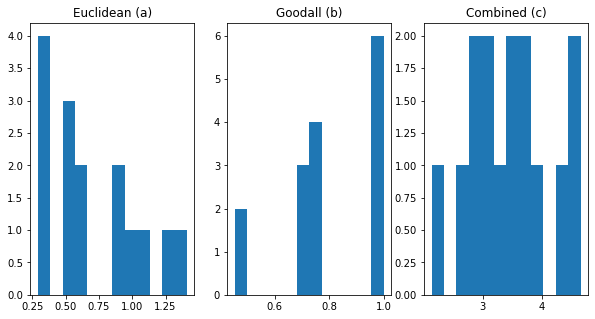

In [59]:
# bins
b = 12

num = list(numsim.values())
cat = list(catsim.values())
comb = list(combsim.values())

fig, ax = plt.subplots(1, 3, figsize=(10,5))

ax[0].hist(num, bins=b)
ax[0].set_title('Euclidean (a)')

ax[1].hist(cat, bins=b)
ax[1].set_title('Goodall (b)')

ax[2].hist(comb, bins=b)
ax[2].set_title('Combined (c)')

Based on this, the best measure to cluster the cows would be the method we used in part b. There we calculated pairwise Goodall distances for categorical variables. When using 12 bins, it is clear to see three separate clusters in the above middle plot.

### ii)

#### a)

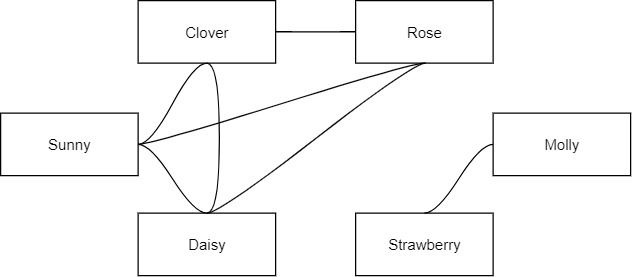

In [3]:
from IPython.display import Image
Image(filename='clustering_a.jpg')

#### b)

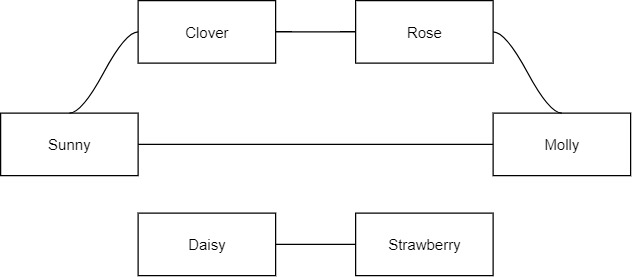

In [4]:
from IPython.display import Image
Image(filename='clustering_b.jpg')

#### c)

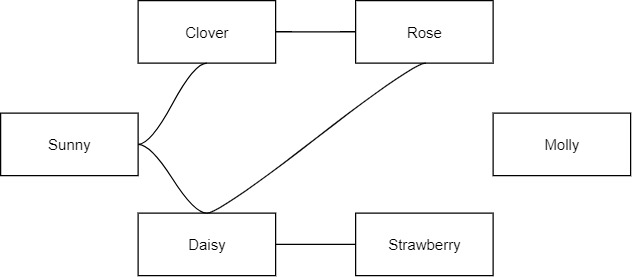

In [5]:
from IPython.display import Image
Image(filename='clustering_c.jpg')

#### Answer:

Measure (a) produced the best clustering with this graph clustering method. This is because the most amount of edges/connections were preserved while achieving the two connected components via the longest distance edge removal procedure. In other words, the two clusters seem the clearest in measure a's edge-node graph.